## Extracting Quantitative Measurements from All Channels

In [1]:
import os
import tifffile as tif
import numpy as np
import napari
import pandas as pd
import pyclesperanto_prototype as cle
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops_table

pd.set_option('display.max_columns', None)

In [2]:
# create napari viewer instance
if 'viewer' not in globals():
    viewer = napari.Viewer()

In [3]:
path = "/Users/laura/projects/Bio-image_analysis_school_ScadsAI/prepared_dataset"

nuclei_labels_path = os.path.join(path, "labels_nuclei")
actin_labels_path = os.path.join(path, "labels_actin")
tubulin_labels_path = os.path.join(path, "labels_tubulin")

In [4]:
filenames = [fname for fname in os.listdir(path) if fname.endswith(".tif")]
filenames

['aphidicolin_timelapse.tif',
 'nocodazole_timelapse.tif',
 'AZ-I_timelapse.tif',
 'taxol_timelapse.tif',
 'latrunculin B_timelapse.tif',
 'epothilone B_timelapse.tif',
 'monastrol_timelapse.tif',
 'AZ-H_timelapse.tif',
 'DMSO_timelapse.tif',
 'colchicine_timelapse.tif',
 'doxorubicin_timelapse.tif',
 'cytochalasin B_timelapse.tif',
 'AZ-A_timelapse.tif']

### Process one image as an example

In [5]:
filename = "aphidicolin_timelapse"

In [6]:
# read an image, which will be processed as an example
img = tif.imread(os.path.join(path, f'{filename}.tif'))

In [7]:
# load nuclei and actin segmentation
labels_nuclei = tif.imread(os.path.join(nuclei_labels_path, f'{filename}_labels_dapi.tif'))
labels_actin = tif.imread(os.path.join(actin_labels_path, f'{filename}_labels_actin.tif'))
labels_tubulin = tif.imread(os.path.join(tubulin_labels_path, f'{filename}_labels_tubulin.tif'))

In [8]:
img.shape

(8, 1024, 1280, 3)

In [9]:
# np.newaxis adds a new axis to convert to 2D timelapse (otherwise napari interprets an image with shape 8,y,x as a 3D image)
# new image dimension for each channel will be (8, 1, 1024, 1280)
# this is optional, and can also be done in the viewer Plugins -> Convert to 2D timelapse
img = img[:, np.newaxis, :, :, :]

# do the same for all label images
labels_actin = labels_actin[:, np.newaxis, :, :]
labels_nuclei = labels_nuclei[:, np.newaxis, :, :]
labels_tubulin = labels_tubulin[:, np.newaxis, :, :]

In [10]:
img.shape

(8, 1, 1024, 1280, 3)

In [11]:
# viewer.add_image(img) # and then in the viewer right click on the layer - split RGB or:
viewer.add_image(
    img,
    name=["tubulin", "actin", "nuclei"],
    colormap=["magenta", "green", "blue"],
    channel_axis=4)

[<Image layer 'tubulin' at 0x1754359a0>,
 <Image layer 'actin' at 0x28de57f40>,
 <Image layer 'nuclei' at 0x171d96e20>]

In [13]:
# add segmentation layers to the viewer
viewer.add_labels(labels_actin, name="actin_segmented")
viewer.add_labels(labels_nuclei, name="nuclei_segmented")
viewer.add_labels(labels_tubulin, name="tubulin_segmented")

<Labels layer 'tubulin_segmented' at 0x29eb3bc70>

analyzing frame 0
analyzing frame 1
analyzing frame 2
analyzing frame 3
analyzing frame 4
analyzing frame 5
analyzing frame 6
analyzing frame 7
Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


#### Quantitative features extraction interactively in napari

> ***Optional step**. Measurements in the notebook performed a few cells below.*

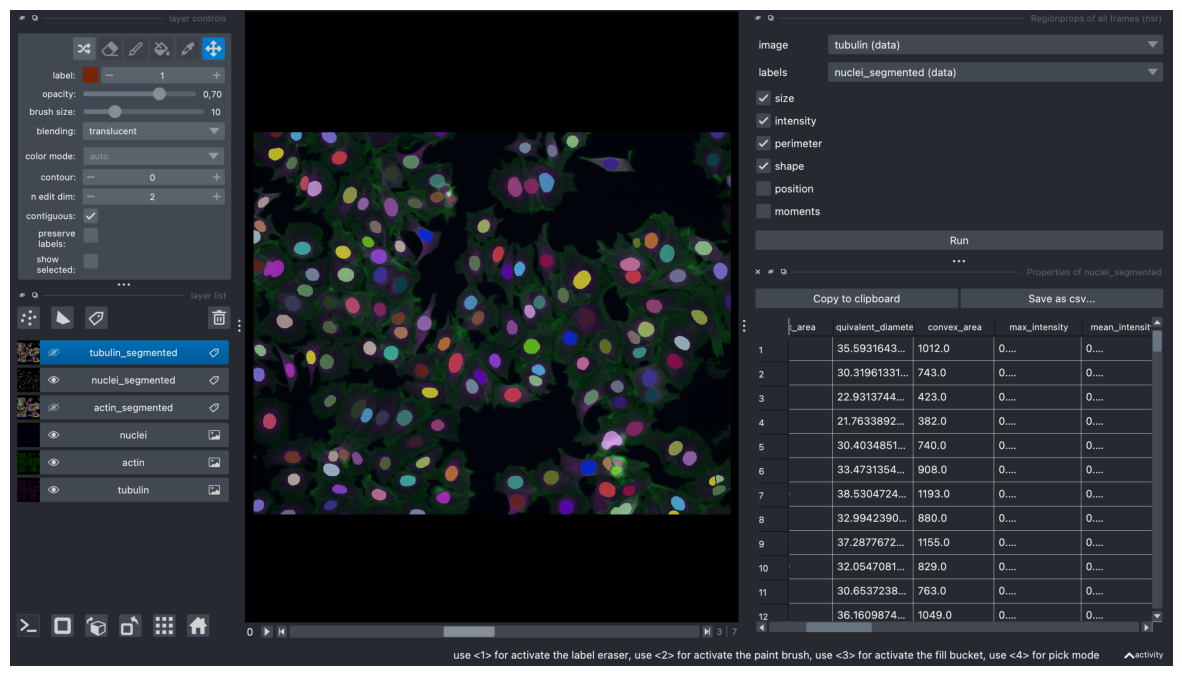

In [14]:
screenshot = viewer.screenshot(canvas_only=False)

plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.show()

In [15]:
# if measurements were performed interactively in napari, now they can be accessted like this as a dictionary:
measurements_dict = viewer.layers["nuclei_segmented"].properties

In [16]:
# convert the dictionary to a dataframe
df = pd.DataFrame(measurements_dict)

In [17]:
df

,label,area,bbox_area,equivalent_diameter,convex_area,max_intensity,mean_intensity,min_intensity,perimeter,perimeter_crofton,extent,local_centroid-0,local_centroid-1,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,standard_deviation_intensity,aspect_ratio,roundness,circularity,frame,index
0,1,995.0,1140.0,35.593164,1012.0,0.318160,0.192936,0.105085,117.355339,113.941355,0.872807,13.660302,18.520603,0.983202,41.340053,40.112175,31.988605,1.412905,0.603347,0.034753,1.253952,0.787373,0.907877,0,1
1,2,722.0,864.0,30.319613,743.0,0.341404,0.232566,0.150121,103.112698,100.438485,0.835648,11.022161,17.437673,0.971736,39.824616,38.679820,24.131011,1.331999,0.781532,0.031844,1.602909,0.614439,0.853341,0,2
2,3,413.0,555.0,22.931374,423.0,0.228087,0.171470,0.128329,87.698485,85.824894,0.744144,5.702179,18.234867,0.976359,37.054015,35.867908,15.692725,1.558994,0.899211,0.018439,2.285639,0.408741,0.674801,0,3
3,4,372.0,468.0,21.763389,382.0,0.281840,0.177370,0.102663,89.006097,87.260938,0.794872,4.666667,21.000000,0.973822,39.458839,39.738610,12.541995,1.509661,0.948888,0.038201,3.168444,0.299935,0.590083,0,4
4,5,726.0,900.0,30.403485,740.0,0.326392,0.144293,0.065860,103.941125,101.223883,0.806667,10.513774,16.249311,0.981081,39.812058,37.585931,25.429371,-1.301553,0.736382,0.044673,1.478052,0.654329,0.844446,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,118,38.0,56.0,6.955796,38.0,0.376508,0.319449,0.276190,20.142136,21.777459,0.678571,3.500000,3.000000,1.000000,8.246211,7.864235,6.176876,-0.589370,0.618939,0.028576,1.273174,0.782313,1.177016,7,118
1410,119,1097.0,1296.0,37.373035,1114.0,0.418413,0.241001,0.137143,122.426407,118.749029,0.846451,18.824977,17.696445,0.984740,41.048752,38.329324,36.802085,-0.779520,0.279469,0.058766,1.041499,0.950724,0.919743,7,119
1411,120,740.0,891.0,30.695232,782.0,0.427937,0.226356,0.134603,106.769553,103.905400,0.830527,14.502703,15.629730,0.946292,36.235342,34.693218,28.141013,-1.564113,0.584854,0.065014,1.232835,0.782803,0.815731,7,120
1412,121,569.0,736.0,26.916042,582.0,0.307302,0.170925,0.059683,93.112698,90.957891,0.773098,12.956063,16.377856,0.977663,33.615473,32.447875,23.567972,-1.450031,0.687343,0.066007,1.376778,0.688097,0.824716,7,121


> ***Note**: There is a frame column, which indicates from which frame the object comes from. In our case, since our generated image is not a true timelapse, frame indicates at which compound concentration the image was taken.*

Learn more about different extracted features [here](https://focalplane.biologists.com/2023/05/03/feature-extraction-in-napari/).

### Same measurements can be done in the notebook

In [29]:
# define properties that will be extracted
properties = ['label', 'area', 'bbox_area', 'equivalent_diameter', 'mean_intensity', 'min_intensity', 'max_intensity', 'perimeter', 'perimeter_crofton', 'extent', 'local_centroid', 'solidity', 'feret_diameter_max', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'orientation', 'solidity']

In [23]:
measurements_list = []

for t in tqdm(range(img.shape[0])):

    image = img[t, 0, :, :, 2] # or viewer.layers["nuclei"].data[t]

    # measurements = cle.statistics_of_labelled_pixels(intensity_image = viewer.layers["nuclei"].data[t], label_image = labels_nuclei[t][0])
    measurements = regionprops_table(labels_nuclei[t][0], intensity_image=image, properties=properties)
    
    # neighborhood statistics if needed can be extracted like this:
    # neighborhood_stats = cle.statistics_of_labelled_neighbors(label_image = labels_nuclei[t][0], nearest_neighbor_ns=(2, 4, 6), proximal_distances=([100]), dilation_radii=[])
    
    # convert dictionaries to pandas dataframe
    df = pd.DataFrame(measurements)
    
    # df_neighbors = pd.DataFrame(neighborhood_stats) neighborhood measurements performed only for actin & tubulin channels
    
    # if neighborhood measurements were extracted both dataframes can be combined like this
    # combined_df = pd.merge(df, df_neighbors, on='label')
    
    measurements_list.append(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.74it/s]


In [24]:
# combine measurements from all timepoints into one dataframe
dapi_df = pd.concat(measurements_list, keys=range(len(measurements_list)))

# reset index to move 'frame' from the index to a regular column
dapi_df.reset_index(level=0, inplace=True)
dapi_df.rename(columns={'level_0': 'frame'}, inplace=True)

In [26]:
# add a suffix '_dapi' to each column name except 'label' to indicate that the measurements are coming from this channel
final_df = dapi_df.rename(columns={col: col + '_dapi' if col not in ['label', 'frame'] else col for col in dapi_df.columns})

In [27]:
final_df

,frame,label,area_dapi,bbox_area_dapi,equivalent_diameter_dapi,mean_intensity_dapi,min_intensity_dapi,max_intensity_dapi,perimeter_dapi,perimeter_crofton_dapi,extent_dapi,local_centroid-0_dapi,local_centroid-1_dapi,solidity_dapi,feret_diameter_max_dapi,major_axis_length_dapi,minor_axis_length_dapi,eccentricity_dapi,orientation_dapi
0,0,1,995.0,1140.0,35.593164,0.291974,0.115909,0.415909,117.355339,113.941355,0.872807,13.660302,18.520603,0.983202,41.340053,40.112175,31.988605,0.603347,1.412905
1,0,2,722.0,864.0,30.319613,0.267253,0.093182,0.388636,103.112698,100.438485,0.835648,11.022161,17.437673,0.971736,39.824616,38.679820,24.131011,0.781532,1.331999
2,0,3,413.0,555.0,22.931374,0.247964,0.152273,0.343182,87.698485,85.824894,0.744144,5.702179,18.234867,0.976359,37.054015,35.867908,15.692725,0.899211,1.558994
3,0,4,372.0,468.0,21.763389,0.230285,0.102273,0.329545,89.006097,87.260938,0.794872,4.666667,21.000000,0.973822,39.458839,39.738610,12.541995,0.948888,1.509661
4,0,5,726.0,900.0,30.403485,0.256483,0.138636,0.361364,103.941125,101.223883,0.806667,10.513774,16.249311,0.981081,39.812058,37.585931,25.429371,0.736382,-1.301553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,7,118,38.0,56.0,6.955796,0.253128,0.177358,0.328302,20.142136,21.777459,0.678571,3.500000,3.000000,1.000000,8.246211,7.864235,6.176876,0.618939,-0.589370
118,7,119,1097.0,1296.0,37.373035,0.285723,0.147170,0.381132,122.426407,118.749029,0.846451,18.824977,17.696445,0.984740,41.048752,38.329324,36.802085,0.279469,-0.779520
119,7,120,740.0,891.0,30.695232,0.251020,0.135849,0.324528,106.769553,103.905400,0.830527,14.502703,15.629730,0.946292,36.235342,34.693218,28.141013,0.584854,-1.564113
120,7,121,569.0,736.0,26.916042,0.218238,0.154717,0.286792,93.112698,90.957891,0.773098,12.956063,16.377856,0.977663,33.615473,32.447875,23.567972,0.687343,-1.450031


#### Get measurements for actin and tubulin channels

#### Actin

In [30]:
measurements_list = []

for t in tqdm(range(img.shape[0])):

    image = img[t, 0, :, :, 1] # or viewer.layers["actin"].data[t]

    measurements = regionprops_table(labels_nuclei[t][0], intensity_image=image, properties=properties)
    #neighborhood_stats = cle.statistics_of_labelled_neighbors(label_image = labels_actin[t][0], nearest_neighbor_ns=(2, 4, 6), proximal_distances=([100]), dilation_radii=[])
    
    # convert dictionaries to pandas dataframe
    df = pd.DataFrame(measurements)
    #df_neighbors = pd.DataFrame(neighborhood_stats)
    
    #combined_df = pd.merge(df, df_neighbors, on='label')
    
    measurements_list.append(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.80it/s]


In [31]:
# combine measurements from all timepoints into one dataframe
actin_df = pd.concat(measurements_list, keys=range(len(measurements_list)))

# reset index to move 'frame' from the index to a regular column
actin_df.reset_index(level=0, inplace=True)
actin_df.rename(columns={'level_0': 'frame'}, inplace=True)

In [32]:
# add a suffix '_actin' to each column name except 'label' to indicate that the measurements are coming from this channel
actin_final_df = actin_df.rename(columns={col: col + '_actin' if col not in ['label', 'frame'] else col for col in actin_df.columns})

In [34]:
measurements_list = []

for t in tqdm(range(img.shape[0])):

    image = img[t, 0, :, :, 0] # or viewer.layers["tubulin"].data[t]

    measurements = regionprops_table(labels_nuclei[t][0], intensity_image=image, properties=properties)

    # measurements = cle.statistics_of_labelled_pixels(intensity_image = image, label_image = labels_tubulin[t][0])
    # neighborhood_stats = cle.statistics_of_labelled_neighbors(label_image = labels_tubulin[t][0], nearest_neighbor_ns=(2, 4, 6), proximal_distances=([100]), dilation_radii=[])
    
    # convert dictionaries to pandas dataframe
    df = pd.DataFrame(measurements)
    # df_neighbors = pd.DataFrame(neighborhood_stats)
    
    # combined_df = pd.merge(df, df_neighbors, on='label')
    
    measurements_list.append(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.70it/s]


In [35]:
# combine measurements from all timepoints into one dataframe
tubulin_df = pd.concat(measurements_list, keys=range(len(measurements_list)))

# reset index to move 'frame' from the index to a regular column
tubulin_df.reset_index(level=0, inplace=True)
tubulin_df.rename(columns={'level_0': 'frame'}, inplace=True)

In [36]:
# add a suffix '_tubulin' to each column name except 'label' to indicate that the measurements are coming from this channel
tubulin_final_df = tubulin_df.rename(columns={col: col + '_tubulin' if col not in ['label', 'frame'] else col for col in tubulin_df.columns})

#### Combine all dataframes into one

In [37]:
df_combined = pd.merge(final_df, actin_final_df, on=['label', 'frame'])
df_combined = pd.merge(df_combined, tubulin_final_df, on=['label', 'frame'])

In [38]:
df_combined

,frame,label,area_dapi,bbox_area_dapi,equivalent_diameter_dapi,mean_intensity_dapi,min_intensity_dapi,max_intensity_dapi,perimeter_dapi,perimeter_crofton_dapi,extent_dapi,local_centroid-0_dapi,local_centroid-1_dapi,solidity_dapi,feret_diameter_max_dapi,major_axis_length_dapi,minor_axis_length_dapi,eccentricity_dapi,orientation_dapi,area_actin,bbox_area_actin,equivalent_diameter_actin,mean_intensity_actin,min_intensity_actin,max_intensity_actin,perimeter_actin,perimeter_crofton_actin,extent_actin,local_centroid-0_actin,local_centroid-1_actin,solidity_actin,feret_diameter_max_actin,major_axis_length_actin,minor_axis_length_actin,eccentricity_actin,orientation_actin,area_tubulin,bbox_area_tubulin,equivalent_diameter_tubulin,mean_intensity_tubulin,min_intensity_tubulin,max_intensity_tubulin,perimeter_tubulin,perimeter_crofton_tubulin,extent_tubulin,local_centroid-0_tubulin,local_centroid-1_tubulin,solidity_tubulin,feret_diameter_max_tubulin,major_axis_length_tubulin,minor_axis_length_tubulin,eccentricity_tubulin,orientation_tubulin
0,0,1,995.0,1140.0,35.593164,0.291974,0.115909,0.415909,117.355339,113.941355,0.872807,13.660302,18.520603,0.983202,41.340053,40.112175,31.988605,0.603347,1.412905,995.0,1140.0,35.593164,0.114951,0.092154,0.149440,117.355339,113.941355,0.872807,13.660302,18.520603,0.983202,41.340053,40.112175,31.988605,0.603347,1.412905,995.0,1140.0,35.593164,0.192936,0.105085,0.318160,117.355339,113.941355,0.872807,13.660302,18.520603,0.983202,41.340053,40.112175,31.988605,0.603347,1.412905
1,0,2,722.0,864.0,30.319613,0.267253,0.093182,0.388636,103.112698,100.438485,0.835648,11.022161,17.437673,0.971736,39.824616,38.679820,24.131011,0.781532,1.331999,722.0,864.0,30.319613,0.199218,0.115816,0.387298,103.112698,100.438485,0.835648,11.022161,17.437673,0.971736,39.824616,38.679820,24.131011,0.781532,1.331999,722.0,864.0,30.319613,0.232566,0.150121,0.341404,103.112698,100.438485,0.835648,11.022161,17.437673,0.971736,39.824616,38.679820,24.131011,0.781532,1.331999
2,0,3,413.0,555.0,22.931374,0.247964,0.152273,0.343182,87.698485,85.824894,0.744144,5.702179,18.234867,0.976359,37.054015,35.867908,15.692725,0.899211,1.558994,413.0,555.0,22.931374,0.148291,0.112080,0.278954,87.698485,85.824894,0.744144,5.702179,18.234867,0.976359,37.054015,35.867908,15.692725,0.899211,1.558994,413.0,555.0,22.931374,0.171470,0.128329,0.228087,87.698485,85.824894,0.744144,5.702179,18.234867,0.976359,37.054015,35.867908,15.692725,0.899211,1.558994
3,0,4,372.0,468.0,21.763389,0.230285,0.102273,0.329545,89.006097,87.260938,0.794872,4.666667,21.000000,0.973822,39.458839,39.738610,12.541995,0.948888,1.509661,372.0,468.0,21.763389,0.172676,0.100872,0.283935,89.006097,87.260938,0.794872,4.666667,21.000000,0.973822,39.458839,39.738610,12.541995,0.948888,1.509661,372.0,468.0,21.763389,0.177370,0.102663,0.281840,89.006097,87.260938,0.794872,4.666667,21.000000,0.973822,39.458839,39.738610,12.541995,0.948888,1.509661
4,0,5,726.0,900.0,30.403485,0.256483,0.138636,0.361364,103.941125,101.223883,0.806667,10.513774,16.249311,0.981081,39.812058,37.585931,25.429371,0.736382,-1.301553,726.0,900.0,30.403485,0.168029,0.109589,0.250311,103.941125,101.223883,0.806667,10.513774,16.249311,0.981081,39.812058,37.585931,25.429371,0.736382,-1.301553,726.0,900.0,30.403485,0.144293,0.065860,0.326392,103.941125,101.223883,0.806667,10.513774,16.249311,0.981081,39.812058,37.585931,25.429371,0.736382,-1.301553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,7,118,38.0,56.0,6.955796,0.253128,0.177358,0.328302,20.142136,21.777459,0.678571,3.500000,3.000000,1.000000,8.246211,7.864235,6.176876,0.618939,-0.589370,38.0,56.0,6.955796,0.178032,0.148515,0.213579,20.142136,21.777459,0.678571,3.500000,3.000000,1.000000,8.246211,7.864235,6.176876,0.618939,-0.589370,38.0,56.0,6.955796,0.319449,0.276190,0.376508,20.142136,21.7

In [39]:
# since we have a lot of measurements, remove a few columns, which are not interesting, e.g. relevant ones for 3D images or redundant
# substrings_to_check = ["_z_", "bbox_depth_", "bbox_min_", "bbox_max_", "touch_portion"]
# columns_to_drop = [col for col in df_combined.columns if any(sub in col for sub in substrings_to_check)]

In [40]:
# columns_to_drop.extend(["original_label_dapi", "original_label_actin", "original_label_tubulin"])
# df_combined.drop(columns=columns_to_drop, inplace=True)
# df_combined

In [41]:
viewer.layers['tubulin_segmented'].properties = df_combined

In [42]:
# save the dataframe to a csv file
df_combined.to_csv(f'{filename}_measurements.csv', index=False)